In [2]:
# importing and configering libs

In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

pd.set_option('display.max_columns',2000) # show all columns in jupyter
pd.set_option('display.max_rows', 100) # display 100 at least rows

In [4]:
# Loading the data

In [5]:
colsToLoad =["INSTNM","ADM_RATE","ADM_RATE_ALL","ACTCMMID","ACTENMID","ACTMTMID","ACTWRMID","SAT_AVG","SAT_AVG_ALL","SATMTMID","UGDS","HIGHDEG", "CONTROL", "TUITFTE", "INEXPFTE", "AVGFACSAL", "COSTT4_P",
             "COSTT4_A", "PCTFLOAN", "PCTPELL", "COMP_ORIG_YR2_RT","UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_ASIAN","UGDS_AIAN","UGDS_NHPI","UGDS_2MOR","UGDS_NRA","UGDS_UNKN","PPTUG_EF","COSTT4_A","TUITIONFEE_IN","TUITIONFEE_OUT","TUITIONFEE_PROG","TUITFTE","AVGFACSAL","DEATH_YR3_RT","COMP_ORIG_YR3_RT","LOAN_DEATH_YR3_RT","LOAN_COMP_ORIG_YR3_RT","DEATH_YR4_RT","COMP_ORIG_YR4_RT","COMPL_RPY_1YR_RT","AGE_ENTRY","COUNT_NWNE_P10","COUNT_WNE_P10","MN_EARN_WNE_P10","MD_EARN_WNE_P10"]

# As each data row represent a specific institute , So we can use institute name as an index
index_feature = "INSTNM"

scoreCardDF = pd.read_csv("I:\\NU Project\\Git-Repo\\Data\\MERGED2013_14_PP.csv", index_col=index_feature, usecols=colsToLoad)
# ignore "MEDIAN_HH_INC" column, as 0 non-null float64

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1606) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# General exploration of data 

In [7]:
scoreCardDF.head()

,HIGHDEG,CONTROL,ADM_RATE,ADM_RATE_ALL,SATMTMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,COMP_ORIG_YR2_RT,DEATH_YR3_RT,COMP_ORIG_YR3_RT,LOAN_DEATH_YR3_RT,LOAN_COMP_ORIG_YR3_RT,DEATH_YR4_RT,COMP_ORIG_YR4_RT,COMPL_RPY_1YR_RT,AGE_ENTRY,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10
INSTNM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,4,1,0.8989,0.8989,400.0,17.0,17.0,17.0,NaN,823.0,823.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,18888.0,NaN,7182.0,12774.0,NaN,9063.0,7459.0,7079.0,0.7115,0.8204,0.034958602,PrivacySuppressed,0.097451274,PrivacySuppressed,0.087332809,PrivacySuppressed,0.241845664,0.3075801749,20.540410133,246,1741,34300,29900
University of Alabama at Birmingham,4,1,0.8673,0.8673,585.0,25.0,26.0,23.0,NaN,1146.0,1146.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,19990.0,NaN,7206.0,16398.0,NaN,9033.0,17208.0,10170.0,0.3505,0.5397,0.150529204,PrivacySuppressed,0.333945628,PrivacySuppressed,0.332664527,PrivacySuppressed,0.422933112,0.578436134,23.45881476,470,3474,46400,40200
Amridge University,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031,0.0000,0.0000,0.2671,0.3727,12300.0,NaN,6870.0,6870.0,NaN,12057.0,5123.0,3849.0,0.6839,0.7629,0.058823529,PrivacySuppressed,0.161849711,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.209580838,0.3859649123,33.925581395,57,168,46100,40100
University of Alabama in Huntsville,4,1,0.8062,0.8062,580.0,26.0,26.0,25.0,NaN,1180.0,1180.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,20306.0,NaN,9192.0,21506.0,NaN,8322.0,9352.0,9341.0,0.3281,0.4728,0.157939189,PrivacySuppressed,0.284602076,PrivacySuppressed,0.283109405,PrivacySuppressed,0.393046107,0.639589169,24.10127697,188,1361,50500,45600
Alabama State University,4,1,0.5125,0.5125,425.0,17.0,17.0,17.0,NaN,830.0,830.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,17400.0,NaN,8720.0,15656.0,NaN,7813.0,7393.0,6557.0,0.8265,0.8735,0.028949025,PrivacySuppressed,0.115574348,PrivacySuppressed,0.10949464,PrivacySuppressed,0.187935035,0.2118863049,20.648575305,285,1977,29500,26700


In [8]:
scoreCardDF.shape

(7804, 45)

In [9]:
scoreCardDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7804 entries, Alabama A & M University to Georgia Military College-Stone Mountain
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HIGHDEG                7804 non-null   int64  
 1   CONTROL                7804 non-null   int64  
 2   ADM_RATE               2221 non-null   float64
 3   ADM_RATE_ALL           2486 non-null   float64
 4   SATMTMID               1317 non-null   float64
 5   ACTCMMID               1344 non-null   float64
 6   ACTENMID               1167 non-null   float64
 7   ACTMTMID               1168 non-null   float64
 8   ACTWRMID               300 non-null    float64
 9   SAT_AVG                1422 non-null   float64
 10  SAT_AVG_ALL            1532 non-null   float64
 11  UGDS                   7091 non-null   float64
 12  UGDS_WHITE             7091 non-null   float64
 13  UGDS_BLACK             7091 non-null   float64
 14  UGD

In [10]:
# Assuming that the output or target variable is COMPL_RPY_1YR_RT
target_feature = "COMPL_RPY_1YR_RT"

In [11]:
# get the number of null values at each column to check if target variable COMPL_RPY_1YR_RT has null at any rows or not
scoreCardDF.isnull().sum()

HIGHDEG                     0
CONTROL                     0
ADM_RATE                 5583
ADM_RATE_ALL             5318
SATMTMID                 6487
ACTCMMID                 6460
ACTENMID                 6637
ACTMTMID                 6636
ACTWRMID                 7504
SAT_AVG                  6382
SAT_AVG_ALL              6272
UGDS                      713
UGDS_WHITE                713
UGDS_BLACK                713
UGDS_HISP                 713
UGDS_ASIAN                713
UGDS_AIAN                 713
UGDS_NHPI                 713
UGDS_2MOR                 713
UGDS_NRA                  713
UGDS_UNKN                 713
PPTUG_EF                  732
COSTT4_A                 3665
COSTT4_P                 5261
TUITIONFEE_IN            3298
TUITIONFEE_OUT           3517
TUITIONFEE_PROG          5056
TUITFTE                   442
INEXPFTE                  442
AVGFACSAL                3150
PCTPELL                   741
PCTFLOAN                  741
COMP_ORIG_YR2_RT          207
DEATH_YR3_

In [12]:
# Data preprocessing

In [13]:
# drop all rows that do not have a value for out target variable
scoreCardDF = scoreCardDF[(scoreCardDF[target_feature] != "PrivacySuppressed")\
                          & (scoreCardDF[target_feature] != np.nan)\
                          & (scoreCardDF[target_feature] != None)\
                          &(scoreCardDF[target_feature].notna())]
scoreCardDF.shape

(5632, 45)

In [14]:
# Extract input features by exluding the index feature and target output feature from the loadd features
input_features =  [f for f in colsToLoad if f not in [index_feature,target_feature]] 
# Specify categorial features columns
cat_columns = ["HIGHDEG","CONTROL"]
# Extract input float features by excluding categorial features
float_columns = [f for f in input_features if f not in cat_columns]

In [15]:
# As some columns have PrivacySuppressed as a value to indicate that the value is missing/hidden due to data privacy
# we define function that loop across all columns (features) to replace "PrivacySuppressed" value with null/nan 
# and convert it into float type
def cleanPrivacySuppressed(dataFrame):
    for colName in dataFrame.columns:
        dataFrame[colName] = dataFrame[colName].replace("PrivacySuppressed", np.nan)
        dataFrame[colName] = dataFrame[colName].astype(float)
    return dataFrame

# Build an estimator for this function to be used by ML pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class PrivacySuppressedHandler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        return cleanPrivacySuppressed(X)

In [16]:
# pipeline for all float columns
# it is a separate pipline, because there is a potential to add more preprocessing steps based on model evaluation
float_pipeline = ColumnTransformer([("privacy_suppressed_handler", PrivacySuppressedHandler(),float_columns)])

In [17]:
# pipeline for all Categoricol (discrete) columns
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = ColumnTransformer([("hot_encoder",OneHotEncoder(sparse=False),cat_columns)])

In [18]:
# Build a full pipeline for preprocessing by merge these two pipelines in one
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[("float_pipeline", float_pipeline),("cat_pipeline", cat_pipeline)])

In [19]:
# Execute the preprocessing pipeline of the input features
processed_input_features = full_pipeline.fit_transform(scoreCardDF)
processed_input_features = pd.DataFrame(processed_input_features)
target_output = scoreCardDF[target_feature]

In [20]:
# Split the data into training and test sets with ratio 80 / 20
input_train, input_test, output_train, output_test =\
    train_test_split(processed_input_features, target_output.values, test_size=0.2, random_state=0)

In [21]:
# deine function to impute/replace null values with mean value across all columns of training datafram using scikit learn imputer
from sklearn.impute import SimpleImputer
def imputeNullWithMean(dataFrame):
    imputer = SimpleImputer(strategy='mean')
    imputed_data = pd.DataFrame(imputer.fit_transform(dataFrame), columns=dataFrame.columns)
    return imputed_data , imputer

In [22]:
# imputation using mean value
input_train ,imputer = imputeNullWithMean(input_train)
input_test = imputer.fit_transform(input_test)
#input_train.isnull().sum()

In [23]:
# Training the algorithm (SVR - SVM for regression wit linear kernel and RBF kernel)
svr_lin = LinearSVR()
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

svr_lin.fit(input_train, output_train)
svr_rbf.fit(input_train, output_train)

F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
# To make predictions on the test data
lin_output_pred = svr_lin.predict(input_test)
rbf_output_pred = svr_rbf.predict(input_test)

# To mak prediction on the training data to be used laterly while comparing error metrices for both 
# data sets to chech model overfitting or underfitting
lin_output_train_pred = svr_lin.predict(input_train)
rbf_output_train_pred = svr_rbf.predict(input_train)

In [25]:
# For linear model ,To compare the actual output values for input_test which is (output_test) with the predicted values output_pred
lin_df = pd.DataFrame({'Actual': output_test, 'Predicted': lin_output_pred})
lin_df

,Actual,Predicted
0,0.4418777943,0.635127
1,0.6991869919,0.472759
2,0.2754491018,0.366904
3,0.4281217209,0.643287
4,0.6611295681,0.674025
...,...,...
1122,0.575,0.629693
1123,0.5616024187,0.506255
1124,0.5319148936,0.647100
1125,0.3049327354,0.444781


In [26]:
# For RBF model ,To compare the actual output values for input_test which is (output_test) with the predicted values output_pred
rbf_df = pd.DataFrame({'Actual': output_test, 'Predicted': rbf_output_pred})
rbf_df

,Actual,Predicted
0,0.4418777943,0.497175
1,0.6991869919,0.497175
2,0.2754491018,0.497175
3,0.4281217209,0.497175
4,0.6611295681,0.497175
...,...,...
1122,0.575,0.497175
1123,0.5616024187,0.497175
1124,0.5319148936,0.497175
1125,0.3049327354,0.497175


In [33]:
# The final step is to evaluate the performance of algorithm on training set and test set
# We'll do this by finding the values for MSE, RMSE, and RSE 
# for training and testing set to discover any overfitting or underfitting
print('Linear - Train - Mean Squared Error:', metrics.mean_squared_error(output_train, lin_output_train_pred))
print('Linear - Test - Mean Squared Error:', metrics.mean_squared_error(output_test, lin_output_pred))
print('\n')
print('Linear - Train - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_train, lin_output_train_pred)))
print('Linear - Test - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_test, lin_output_pred)))
print('\n')
print('Linear - Train - Root Squared Error:', r2_score(output_train, lin_output_train_pred))
print('Linear - Test - Root Squared Error:', r2_score(output_test, lin_output_pred))
print('\n')
print('RBF - Train - Mean Squared Error:', metrics.mean_squared_error(output_train, rbf_output_train_pred))
print('RBF - Test - Mean Squared Error:', metrics.mean_squared_error(output_test, rbf_output_pred))
print('\n')
print('RBF - Train - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_train, rbf_output_train_pred)))
print('RBF - Test - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_test, rbf_output_pred)))
print('\n')
print('RBF - Train - Root Squared Error:', r2_score(output_train, rbf_output_train_pred))
print('RBF - Test - Root Squared Error:', r2_score(output_test, rbf_output_pred))

Linear - Train - Mean Squared Error: 0.03548457604173027
Linear - Test - Mean Squared Error: 0.03555184268448197


Linear - Train - Root Mean Squared Error: 0.1883735014319431
Linear - Test - Root Mean Squared Error: 0.18855196282320152


Linear - Train - Root Squared Error: 0.08837849620621085
Linear - Test - Root Squared Error: 0.0985195385809643


RBF - Train - Mean Squared Error: 0.007978229223544122
RBF - Test - Mean Squared Error: 0.03945643667518828


RBF - Train - Root Mean Squared Error: 0.0893209338483657
RBF - Test - Root Mean Squared Error: 0.19863644347195777


RBF - Train - Root Squared Error: 0.7950341772767535
RBF - Test - Root Squared Error: -0.0004884150611212945


In [34]:
# Model Evaluation for linear SVR using Cross Validation 10 fold and root squared
cross_val_score(svr_lin, input_train, output_train, cv=10 ,scoring='r2')

F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\skle

array([-0.05945174, -0.78122885, -0.12948303, -0.08666242,  0.27378116,
       -0.21366066,  0.27575839,  0.25699776, -0.23413695,  0.19001399])

In [35]:
# Model Evaluation for RBF SVR using Cross Validation 10 fold and root squared
cross_val_score(svr_rbf, input_train, output_train, cv=10 ,scoring='r2')

array([0.02942342, 0.02920918, 0.04547303, 0.03294247, 0.02412848,
       0.03748941, 0.01980909, 0.01953319, 0.03303125, 0.03853693])

In [36]:
# Model Evaluation for linear SVR using Cross Validation 10 fold and RMSE
cross_val_score(svr_lin, input_train, output_train, cv=10 ,scoring='neg_root_mean_squared_error')

F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\skle

array([-0.16490693, -0.16203542, -0.20529847, -0.19827269, -0.16656842,
       -0.24410682, -0.15480965, -0.16092326, -0.23155608, -0.1825215 ])

In [37]:
# Model Evaluation for RBF SVR using Cross Validation 10 fold and RMSE
cross_val_score(svr_rbf, input_train, output_train, cv=10 ,scoring='neg_root_mean_squared_error')

array([-0.19641487, -0.19409726, -0.19260375, -0.1843186 , -0.2012764 ,
       -0.19579054, -0.19215732, -0.20325739, -0.19381342, -0.18591522])

In [43]:
# catHotColumns is how oneHotEncoder treats HIGHDEG AND CONTROL in preprocessing
catHotColumns =["HIGHDEG_Non-degree-granting","HIGHDEG_Certificate_degree","HIGHDEG_Associate_degree","HIGHDEG_Associate_degree","HIGHDEG_Associate_degree","CONTROL_Public","CONTROL_Private_nonprofit","CONTROL_Private for-profit"]
# ADD all toghether. this is the structre that gets out from the preprocessing pipline
all_features = float_columns.copy()
all_features.extend(catHotColumns)

In [45]:
# get the features importance for linear model
feature_name_importance_lin = zip(all_features, svr_lin.coef_)
sorted(feature_name_importance_lin, key=lambda x: x[1], reverse=True)

[('CONTROL_Private for-profit', 0.00012185444086393632),
 ('CONTROL_Private_nonprofit', 9.804965150922619e-05),
 ('CONTROL_Public', 1.1780147476077265e-05),
 ('HIGHDEG_Associate_degree', 1.0802638375782255e-05),
 ('HIGHDEG_Associate_degree', 1.0078101496884237e-05),
 ('HIGHDEG_Certificate_degree', 7.942084203800607e-06),
 ('HIGHDEG_Associate_degree', 7.942084203800607e-06),
 ('HIGHDEG_Non-degree-granting', 7.559339946523616e-06),
 ('MD_EARN_WNE_P10', 7.232992867960765e-06),
 ('MN_EARN_WNE_P10', 6.669699513534762e-06),
 ('COUNT_WNE_P10', 6.125980783289651e-06),
 ('COUNT_NWNE_P10', 4.7870855319122405e-06),
 ('AGE_ENTRY', 2.600810882896573e-06),
 ('COMP_ORIG_YR4_RT', 1.982469021542891e-06),
 ('DEATH_YR4_RT', 1.3770170356198744e-06),
 ('LOAN_COMP_ORIG_YR3_RT', 1.192780786020316e-06),
 ('LOAN_DEATH_YR3_RT', 8.229792647854196e-07),
 ('COMP_ORIG_YR3_RT', 6.203651155563623e-07),
 ('DEATH_YR3_RT', 4.973301080197177e-07),
 ('AVGFACSAL', 3.941465912001719e-07),
 ('TUITFTE', 3.3107448183580824e-07

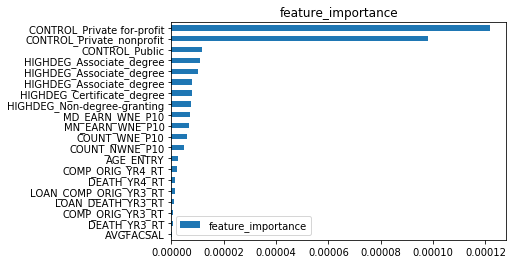

In [46]:
feature_importance_df_lin =pd.DataFrame(data=svr_lin.coef_, index=all_features, columns=["feature_importance"])
ax_lin = feature_importance_df_lin.sort_values("feature_importance", ascending=False).head(20).plot(kind='barh',title='feature_importance')
ax_lin.invert_yaxis()

In [47]:
# parameter tuning using Grid Search technique to get the best parameters
# RBF : dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])
# Linear : dict_keys(['C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose'])
#'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]
# svr_gs = GridSearchCV(svr, params, cv=10)
# svr_gs.fit(input_train, output_train) 
# print("Best Params : ", regressor_gs.best_params_)